In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

obtenção dos dados

In [2]:
# Sample dos dados do enem de 2018

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.0,M,1.0,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.0,M,0.0,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.0,F,0.0,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.0,F,0.0,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.0,M,0.0,3,...,A,B,A,A,D,B,B,B,A,A


In [3]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
colunas_de_notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ["natureza", "humanas", "linguagens", "matematica", "redacao"]
dados_notas.head()

,natureza,humanas,linguagens,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


# Começando o machine learning

Será que é possível prever a nota de linguagens das pessoas com base nas outras notas??

In [5]:
x_input = dados_notas[["natureza", "humanas", "matematica", "redacao"]]
y_output = dados_notas["linguagens"]
print(x_input.head(), end="\n\n")
print(y_output.head())

   natureza  humanas  matematica  redacao
1    523.10   671.30      738.00   680.00
2    409.20   531.70      438.10   600.00
3    452.30   505.50      544.90   400.00
6    428.50   505.20      436.80   560.00
8    491.80   575.70      487.60   660.00

1   661.60
2   389.00
3   448.50
6   521.00
8   524.40
Name: linguagens, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(43267)

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_input, y_output, random_state = 326784)

print(x_treino)
print(x_teste)
print(y_treino)
print(y_teste)

        natureza  humanas  matematica  redacao
25012     610.20   651.90      741.40   660.00
52044     571.70   639.60      639.10   680.00
86543     385.90   569.10      502.00   360.00
36362     424.70   446.20      589.80   420.00
96734     831.40   850.40      943.20   940.00
...          ...      ...         ...      ...
136051    416.20   505.30      455.50   620.00
15740     465.10   683.40      590.00   760.00
70141     402.80   478.30      400.30   560.00
132741    578.90   656.50      649.80   520.00
76871     701.90   625.90      835.60   860.00

[72952 rows x 4 columns]
        natureza  humanas  matematica  redacao
67300     465.40   659.30      743.70   560.00
113766    607.60   654.00      620.90   640.00
48328     632.50   703.10      568.10   720.00
9454      448.00   615.20      498.60   620.00
9515      437.40   465.40      523.20   540.00
...          ...      ...         ...      ...
32842     403.20   615.70      473.40   340.00
42388     559.30   575.20      501

### Fase Treino

In [7]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

### Fase Teste

In [24]:
predicoes_notas_linguagens_linearSVR = modelo.predict(x_teste)
predicoes_notas_linguagens_linearSVR[:5]

array([665.57966166, 684.80498035, 722.77451738, 624.16188702,
       526.23466408])

In [29]:
#transformando a serie num array
y_teste = y_teste.values
y_teste

array([577.2, 624.4, 703. , ..., 397.4, 521.6, 619.9])

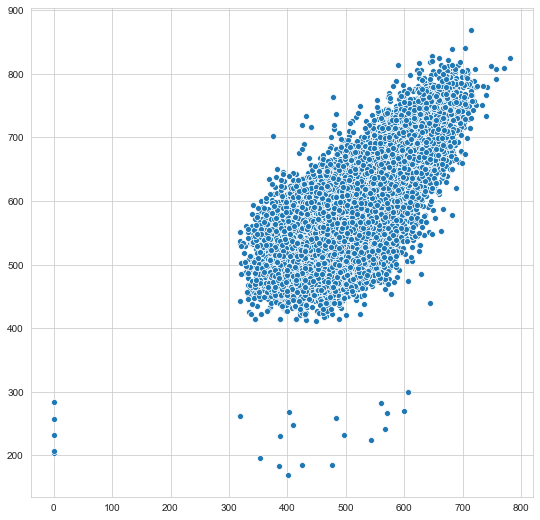

In [30]:
# Gráfico da relação entre as notas do teste (x) e as notas que fizemos as predições com o modelo (y)

plt.figure(figsize=(9,9))
sns.set_style("whitegrid")
sns.scatterplot(x=y_teste, y=predicoes_notas_linguagens_linearSVR)

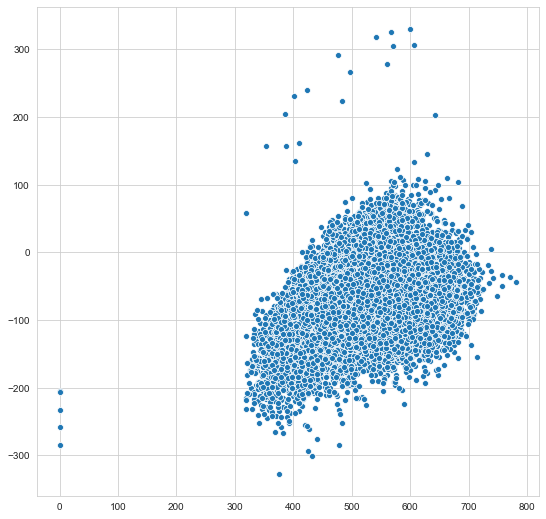

In [31]:
# Gráfico do erro entre as notas de teste e a previsão
plt.figure(figsize=(9, 9))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_notas_linguagens_linearSVR)

# Neste gráfico percebemos que a margem de erro está muito grande em relação as notas e que há uma tendencia da previsão 
# dar notas mais altas para pessoas que tiram notas mais altas, ou seja, quanto maior for a sua nota, 
# maior será a têndencia de prever uma nota mais alta.
# De certa forma, é anti-ético usar esse modelo para tentar prever as notas numa situação real

### Testando outro modelo: SVR

In [12]:
from sklearn.svm import SVR

modelo2 = SVR()
modelo2.fit(x_treino, y_treino)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

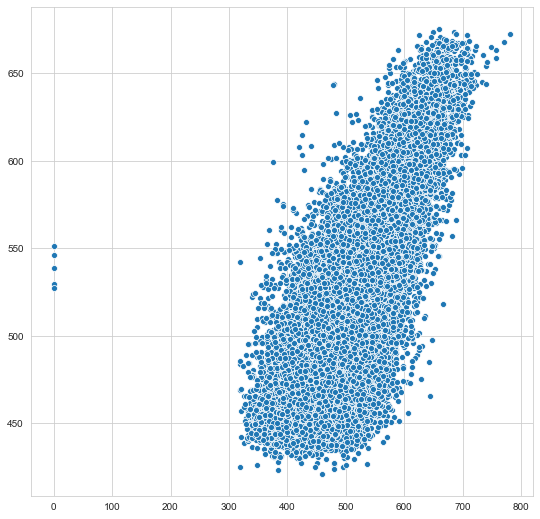

In [66]:
predicoes_notas_linguagens_SVR = modelo2.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste, y=predicoes_notas_linguagens_SVR)

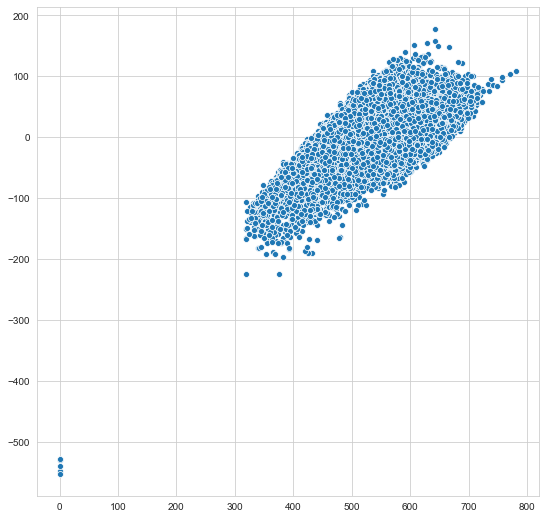

In [34]:
# Comparando o erro
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_notas_linguagens_SVR)

### Testando outro modelo: Decison Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor

modelo3 = DecisionTreeRegressor()
modelo3.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

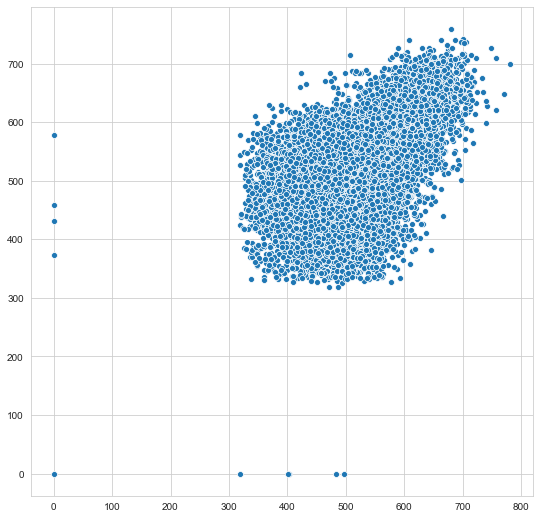

In [67]:
predicoes_notas_linguagens_DecisionTree = modelo3.predict(x_teste)

plt.figure(figsize=(9, 9))
sns.scatterplot(x=y_teste, y=predicoes_notas_linguagens_DecisionTree)

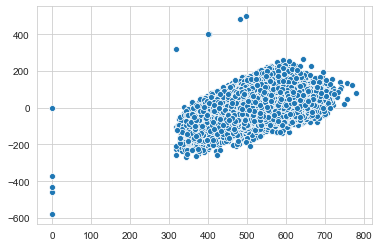

In [68]:
sns.scatterplot(x=y_teste, y=y_teste - predicoes_notas_linguagens_DecisionTree)

# Comparando os modelos

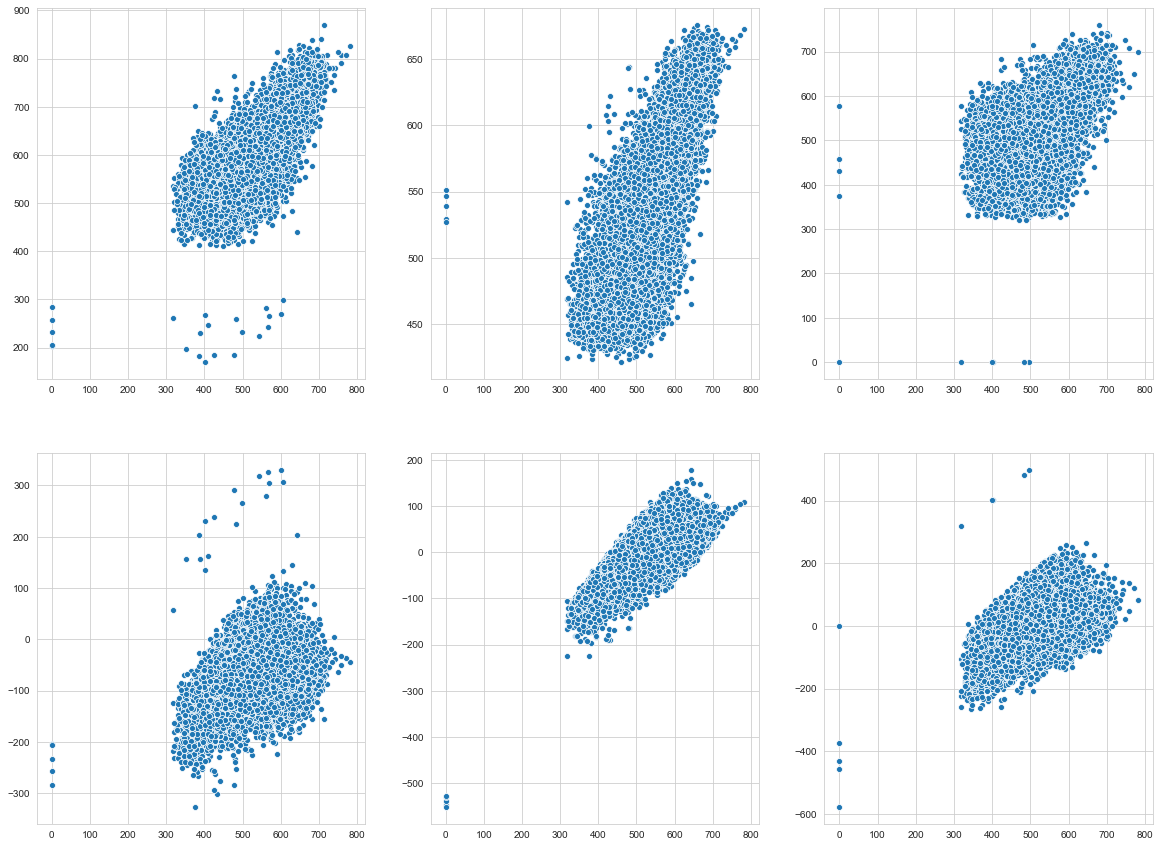

In [83]:
# Observando como os dados se comportam nos gráficos e comparando-os, percebe-se que o erro nos três variam de forma parecida,
# apesar do gráfico de erro SVR ser um pouco mais beneficente às pessoas que tiraram as maiores notas, se comparado 
# aos outros modelos testados.

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 15))

# Gráfico da relação entre as notas do teste (x) e as notas que fizemos as predições com o modelo (y)
sns.scatterplot(x=y_teste, y=predicoes_notas_linguagens_linearSVR, ax=ax1)
sns.scatterplot(x=y_teste, y=predicoes_notas_linguagens_SVR, ax=ax2)
sns.scatterplot(x=y_teste, y=predicoes_notas_linguagens_DecisionTree, ax=ax3)

# Gráfico do erro entre as notas de teste e a previsão
sns.scatterplot(x=y_teste, y=y_teste - predicoes_notas_linguagens_linearSVR, ax=ax4)
sns.scatterplot(x=y_teste, y=y_teste - predicoes_notas_linguagens_SVR, ax=ax5)
sns.scatterplot(x=y_teste, y=y_teste - predicoes_notas_linguagens_DecisionTree, ax=ax6)

### Calculando e comparando o erro quadradro médio entre os modelos vistos

In [75]:
# comparando os modelos de linear SVR, SVR e Decision Tree, podemos perceber que SVR tem um erro muito 
# menor comparado aos outros.
# Ou seja, de acordo com esses testes, se fossemos utilizar essa relação na vida real, seria mais intuitivo o modelo SVR.

from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor(strategy="mean")
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo.predict(x_teste)

print("Erro médio quadrado em relaçaõ à média:",mean_squared_error(y_teste, dummy_predicoes))
print("Erro médio quadrado em relaçaõ ao linear SVR:",mean_squared_error(y_teste, predicoes_notas_linguagens_linearSVR))
print("Erro médio quadrado em relaçaõ ao SVR:",mean_squared_error(y_teste, predicoes_notas_linguagens_SVR))
print("Erro médio quadrado em relaçaõ à Decision Tree:",mean_squared_error(y_teste, predicoes_notas_linguagens_DecisionTree))

Erro médio quadrado em relaçaõ à média: 7183.127808101478
Erro médio quadrado em relaçaõ ao linear SVR: 7183.127808101478
Erro médio quadrado em relaçaõ ao SVR: 2050.1939603631563
Erro médio quadrado em relaçaõ à Decision Tree: 4186.216346739041


# Conclusões

O que foi apresentado neste notebook é apenas uma brincadeira com os dados do enem com fim apenas pedagógico.

Foram testados vários modelos de predição de resultados e o que se mostrou mais eficiente para esse tipo de teste foi o modelo
SVR (Support Vector Regression), apesar de ser extremamente lento comparado aos demais.

Isso se baseando apenas em mean squared error.

### Considerações

Estudo baseado no projeto Quarentena Dados da alura